In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
train = pd.read_csv("data_sets/lab_4_train.csv")
test = pd.read_csv("data_sets/lab_4_test.csv")

In [78]:
# transform B/M labels to ints, 1 = Malignant, 0 = Benign

def category_to_code(dataframe):
    # categorical values get assigned in ascending order from 0
    dataframe['diagnosis'] = pd.Categorical(dataframe['diagnosis'])
    dataframe['diagnosis_code'] = dataframe.diagnosis.cat.codes
    return dataframe


# test correct assignment
train = category_to_code(train)
test = category_to_code(test)

assert train[train['diagnosis'].isin(['B'])]['diagnosis_code'].sum() == 0
assert train[train['diagnosis'].isin(['M'])]['diagnosis_code'].sum() > 0
assert test[test['diagnosis'].isin(['B'])]['diagnosis_code'].sum() == 0
assert test[test['diagnosis'].isin(['M'])]['diagnosis_code'].sum() > 0



In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

features = train.columns.tolist()
features.remove('diagnosis_code')
features.remove('diagnosis')
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(train[features], train['diagnosis_code'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
y_pred = logreg.predict(test[features])
y_true = test['diagnosis_code']
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test[features], y_true)))


Accuracy of logistic regression classifier on test set: 0.88


In [121]:
#compute error 
metrics.log_loss(y_true, y_pred)

4.106025157383022

In [122]:
from sklearn.metrics import classification_report
print(classification_report(test['diagnosis_code'], y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        90
           1       0.93      0.74      0.82        53

   micro avg       0.88      0.88      0.88       143
   macro avg       0.89      0.85      0.87       143
weighted avg       0.89      0.88      0.88       143



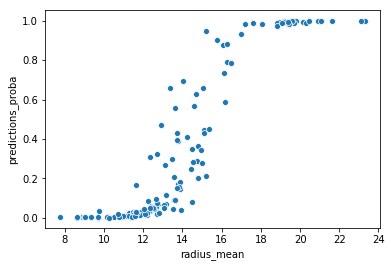

In [123]:
# plot predictions, sigmoid

test['predictions_proba'] = logreg.predict_proba(test[features])[:,1]
sns.scatterplot(x="radius_mean", y="predictions_proba", data=test)

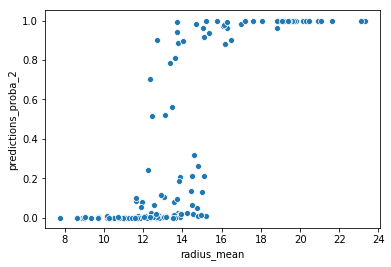

In [124]:
#regularization
logreg2 = LogisticRegression(solver='lbfgs', penalty="l2", C=10000000000, max_iter=10000)
logreg2.fit(train[features], train['diagnosis_code'])
test['predictions_proba_2'] = logreg2.predict_proba(test[features])[:,1]
sns.scatterplot(x="radius_mean", y="predictions_proba_2", data=test)

In [125]:
y_pred2 = logreg2.predict(test[features])
print('log loss of regularized logistic regression classifier on test set: {:.2f}'.format(metrics.log_loss(y_true, y_pred2)))
print('Accuracy of regularized logistic regression classifier on test set: {:.2f}'.format(logreg2.score(test[features], y_true)))


log loss of regularized logistic regression classifier on test set: 2.90
Accuracy of regularized logistic regression classifier on test set: 0.92


In [86]:
#bias v variance